## <div align="center"> PROJECT IS388 Data Analysis </div>
## <div align="center"> Group 3 - Class G </div>
#### <div align="center"> Semester Ganjil 2023/2024 </div>
---

Group 3
1. 00000075386 - Alessandra Valentina
2. 00000076229 - Catherine Olivia
3. 00000077730 - Sabrina Nurul Azmi
4. 00000077121 - Tsabitah Ramadhani Mashur
5. 00000078331 - Zevanaya Beverly Drew

---

#### Explain About Dataset
Dataset yang kami gunakan merupakan dataset Housing Price Dataset dalam  format csv. Dataset ini memiliki data dengan 6 kolom dan 50.000 baris. Kolom pertama, SquareFeet merupakan kolom yang menunjukkan data dari luas rumah dalam satuan kaki persegi. Kedua, Bedrooms menunjukkan data dari jumlah kamar setiap rumah. Ketiga, Bathrooms menunjukkan data dari jumlah kamar mandi setiap rumah. Keempat, Neighborhood menunjukkan data dari daerah tempat rumah tersebut, yang dapat dibagi menjadi tiga, yaitu Rural, Suburb, dan Urban. Kelima, YearBuilt, tahun dibangunnya rumah. Keenam, Price, harga rumah. Berdasarkan 6 kolom tersebut, 5 kolom merupakan kolom numerik dan 1 kolom yaitu Neighborhood merupakan kolom kategorikal.

# Housing Price Dataset

In [1]:
# import library
import pandas as pd
import numpy as np
import base64,os,random,gc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from scipy import stats 

## EXPLORE DATA

In [2]:
# Membaca data
hp = pd.read_csv('housing_price_dataset.csv')
hp.head (10)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
5,2095,2,3,Suburb,2020,198208.803907
6,2724,2,1,Suburb,1993,343429.319110
7,2044,4,3,Rural,1957,184992.321268
8,2638,4,3,Urban,1959,377998.588152
9,1121,5,2,Urban,2004,95961.926014


In [3]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [4]:
hp.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [5]:
hp.shape

(50000, 6)

In [6]:
hp.isnull().sum()
# Tidak ada missing values

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

Berdasarkan langkah awal yang sudah dilakukan diatas, dapat disimpulkan bahwa dataset Housing Price memiliki 50.000 baris dan 6 kolom yang terdiri dari 5 kolom numerik serta 1 kolom kategorikal. Dataset ini tidak memiliki data yang hilang atau missing data.

## PREPARING DATA

membuat kolom baru yang bernama 'YearNow' yang nantinya digunakan untuk menghasilkan kolom 'Age' 

In [7]:
hp["YearNow"] = 2023

Melakukan Encoding pada kolom Neighborhood dengan membuat kolom baru bernama Neighborhood code. Jenis wilayah akan ditambahkan dengan index 0-2, rural = 0, subrural = 1, urban = 2 

In [8]:
hp["Age"] = hp.apply(lambda x: x["YearNow"] - x["YearBuilt"], axis = 1)

kolom 'Age' dibuat dari hasil kolom 'YearNow' - 'YearBuilt' menggunakan fungsi apply () untuk implementasi hasil pengurangan ke dataFrame. Alasan mengapa membuat kolom YearNow dan Age karena ingin melihat jika perbandingan harga rumah dari lama nya rumah itu dibuat. 

In [9]:
hp['Neighborhood'] = hp['Neighborhood'].astype('category')
hp['Neighborhood code'] = hp['Neighborhood'].cat.codes
hp.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,YearNow,Age,Neighborhood code
0,2126,4,1,Rural,1969,215355.283618,2023,54,0
1,2459,3,2,Rural,1980,195014.221626,2023,43,0
2,1860,2,1,Suburb,1970,306891.012076,2023,53,1
3,2294,2,1,Urban,1996,206786.787153,2023,27,2
4,2130,5,2,Suburb,2001,272436.239065,2023,22,1


Melakukan BINNING pada kolom Price dengan membuat kolom baru bernama Price Category dimana jika Price > 224000 = mahal and jika price < 224000 = murah.

In [10]:
hp['Price Category']=np.where(
hp['Price'] > 224000, 'mahal', np.where(
hp['Price'] < 224000, 'murah', -1))
hp.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,YearNow,Age,Neighborhood code,Price Category
0,2126,4,1,Rural,1969,215355.283618,2023,54,0,murah
1,2459,3,2,Rural,1980,195014.221626,2023,43,0,murah
2,1860,2,1,Suburb,1970,306891.012076,2023,53,1,mahal
3,2294,2,1,Urban,1996,206786.787153,2023,27,2,murah
4,2130,5,2,Suburb,2001,272436.239065,2023,22,1,mahal


Melakukan BINNING pada kolom Age dengan membuat kolom baru bernama Age Category dimana Age sendiri akan dibagi menjadi 3 kategori dengan menggunakan library numpy. BINNING ini dilakukan untuk mengetahui kategori rumah yang sudah tua, masih mudah, atau masih baru.

In [11]:
bins = np.linspace(min(hp['Age']),
                   max(hp['Age']), 4)
group_names = ['Baru','Muda','Tua']

hp['Age Category'] = pd.cut(hp['Age'],
                            bins,
                            labels = group_names,
                            include_lowest = True)
hp.head(5)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,YearNow,Age,Neighborhood code,Price Category,Age Category
0,2126,4,1,Rural,1969,215355.283618,2023,54,0,murah,Tua
1,2459,3,2,Rural,1980,195014.221626,2023,43,0,murah,Muda
2,1860,2,1,Suburb,1970,306891.012076,2023,53,1,mahal,Tua
3,2294,2,1,Urban,1996,206786.787153,2023,27,2,murah,Muda
4,2130,5,2,Suburb,2001,272436.239065,2023,22,1,mahal,Baru


In [12]:
# Mengubah urutan kolom
hp = hp[['SquareFeet','Bedrooms','Bathrooms','YearBuilt', 'YearNow', 'Age', 'Age Category', 'Neighborhood','Neighborhood code','Price','Price Category']]
hp.head()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,YearNow,Age,Age Category,Neighborhood,Neighborhood code,Price,Price Category
0,2126,4,1,1969,2023,54,Tua,Rural,0,215355.283618,murah
1,2459,3,2,1980,2023,43,Muda,Rural,0,195014.221626,murah
2,1860,2,1,1970,2023,53,Tua,Suburb,1,306891.012076,mahal
3,2294,2,1,1996,2023,27,Muda,Urban,2,206786.787153,murah
4,2130,5,2,2001,2023,22,Baru,Suburb,1,272436.239065,mahal


In [13]:
# Informasi dari dataset
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   SquareFeet         50000 non-null  int64   
 1   Bedrooms           50000 non-null  int64   
 2   Bathrooms          50000 non-null  int64   
 3   YearBuilt          50000 non-null  int64   
 4   YearNow            50000 non-null  int64   
 5   Age                50000 non-null  int64   
 6   Age Category       50000 non-null  category
 7   Neighborhood       50000 non-null  category
 8   Neighborhood code  50000 non-null  int8    
 9   Price              50000 non-null  float64 
 10  Price Category     50000 non-null  object  
dtypes: category(2), float64(1), int64(6), int8(1), object(1)
memory usage: 3.2+ MB


In [14]:
# Melakukan formatting dengan mengubah data type Price Category yang object menjadi category
hp["Price Category"] = hp["Price Category"].astype("category")
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   SquareFeet         50000 non-null  int64   
 1   Bedrooms           50000 non-null  int64   
 2   Bathrooms          50000 non-null  int64   
 3   YearBuilt          50000 non-null  int64   
 4   YearNow            50000 non-null  int64   
 5   Age                50000 non-null  int64   
 6   Age Category       50000 non-null  category
 7   Neighborhood       50000 non-null  category
 8   Neighborhood code  50000 non-null  int8    
 9   Price              50000 non-null  float64 
 10  Price Category     50000 non-null  category
dtypes: category(3), float64(1), int64(6), int8(1)
memory usage: 2.9 MB


In [15]:
# Melakukan formatting data kolom Price, yaitu dengan mengambil 2 angka di belakang koma untuk mempermudah proses analisa
hp['Price'] = hp['Price'].apply(lambda x: round(x, 2))
hp.head()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,YearNow,Age,Age Category,Neighborhood,Neighborhood code,Price,Price Category
0,2126,4,1,1969,2023,54,Tua,Rural,0,215355.28,murah
1,2459,3,2,1980,2023,43,Muda,Rural,0,195014.22,murah
2,1860,2,1,1970,2023,53,Tua,Suburb,1,306891.01,mahal
3,2294,2,1,1996,2023,27,Muda,Urban,2,206786.79,murah
4,2130,5,2,2001,2023,22,Baru,Suburb,1,272436.24,mahal


In [16]:
# Statistik dari dataset
hp.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,YearNow,Age,Neighborhood code,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,2023.0,37.595580,0.998540,224827.325129
std,575.513241,1.116326,0.815851,20.719377,0.0,20.719377,0.815838,76141.842956
min,1000.000000,2.000000,1.000000,1950.000000,2023.0,2.000000,0.000000,-36588.170000
25%,1513.000000,3.000000,1.000000,1967.000000,2023.0,20.000000,0.000000,169955.865000
50%,2007.000000,3.000000,2.000000,1985.000000,2023.0,38.000000,1.000000,225052.140000
75%,2506.000000,4.000000,3.000000,2003.000000,2023.0,56.000000,2.000000,279373.630000
max,2999.000000,5.000000,3.000000,2021.000000,2023.0,73.000000,2.000000,492195.260000


In [17]:
# Mengecek jumlah baris dan kolom dataset setelah dilakukan preparing data 
hp.shape

(50000, 11)

In [18]:
# Mengecek missing value setelah dilakukan preparing data
hp.isnull().sum()
# Tidak ada missing values

SquareFeet           0
Bedrooms             0
Bathrooms            0
YearBuilt            0
YearNow              0
Age                  0
Age Category         0
Neighborhood         0
Neighborhood code    0
Price                0
Price Category       0
dtype: int64

## DATA VISUALIZATION 1
Visualisasi di bawah ini menggambarkan korelasi antar 6 atribut numerik dataset Housing Price. Berdasarkan visualisasi tersebut, pembaca dapat mengetahui bahwa atribut SquareFeet memiliki hubungan yang paling kuat dengan Price karena hasil korelasinya sebesar 0.75 yang paling mendekati angka 1 diantara yang lainnya.

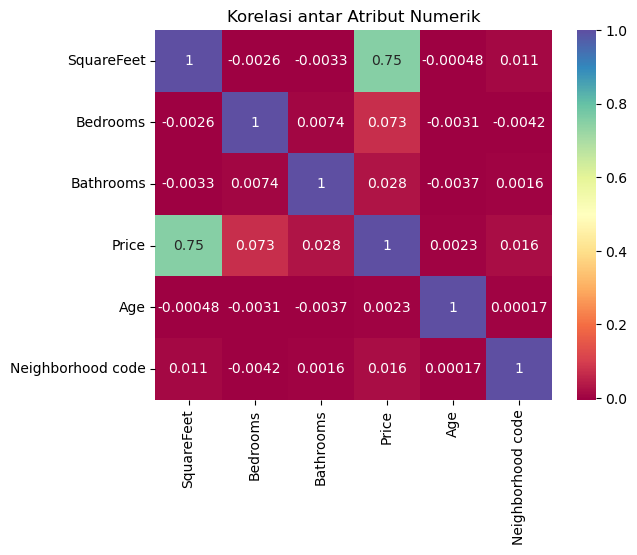

In [19]:
sns.heatmap(hp[['SquareFeet','Bedrooms','Bathrooms','Price', 'Age','Neighborhood code']].corr(), annot = True, cmap="Spectral")
plt.title("Korelasi antar Atribut Numerik")
plt.show()

### Visualisasi 2
Berikut merupakan visualisasi data yang menggambarkan komposisi jumlah rumah yang diwakilkan oleh umur rumah (Age) berdasarkan kategori rumah (Age Category) yang dikelompokkan menjadi 3 bagian. Berdasarkan visualisasi ini, dapat disimpulkan bahwa 33,05% termasuk ke dalam kategori rumah Baru, 33,49% termasuk ke dalam kategori rumah Muda, dan sisanya yang sebesar 33,46% termasuk ke dalam kategori rumah Tua.

In [20]:
# Detail
hp.groupby('Age Category')['Age'].count()

Age Category
Baru    16523
Muda    16745
Tua     16732
Name: Age, dtype: int64

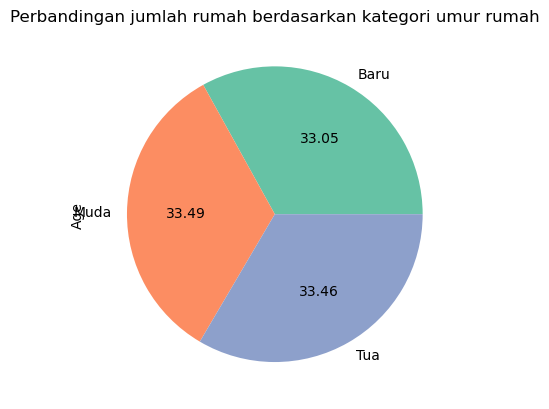

In [75]:
# Menggunakan groupby
diff_age = hp.groupby('Age Category')['Age'].count()
diff_age.plot.pie(subplots = True, autopct = '%.2f', colors = sns.color_palette('Set2'))
plt.title("Perbandingan jumlah rumah berdasarkan kategori umur rumah")
plt.show()

### Visualisasi 3
Berikut merupakan visualisasi data yang menggambarkan distribusi dari dataset Housing Price. Visualisasi ini menunjukkan bahwa data tidak berdistribusi dengan normal karena terdapat dua puncak dibagian atas bel.

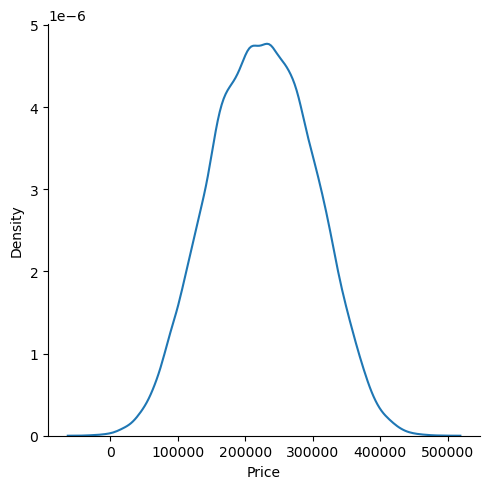

In [22]:
sns.displot(data=hp, x="Price", kind="kde")

### Visualisasi 4
Visualisasi dibawah ini merupakan visualisasi dari dataset yang menampilkan data outlier. Visualisasi ini juga merupakan visualisasi dari dataset sebelum dinormalisasikan. Dapat dilihat bahwa sebelum dinormalisasikan, boxplot dari kolom SquareFeet, Bedrooms, Bathrooms, YearBuilt, YearNow, Age, Neighborhood Code, dan Price tidak tampak. Namun, setelah dilakukan normalisasi (divisualisasi selanjutnya), seluruh kolom memiliki boxplot yang terlihat. 

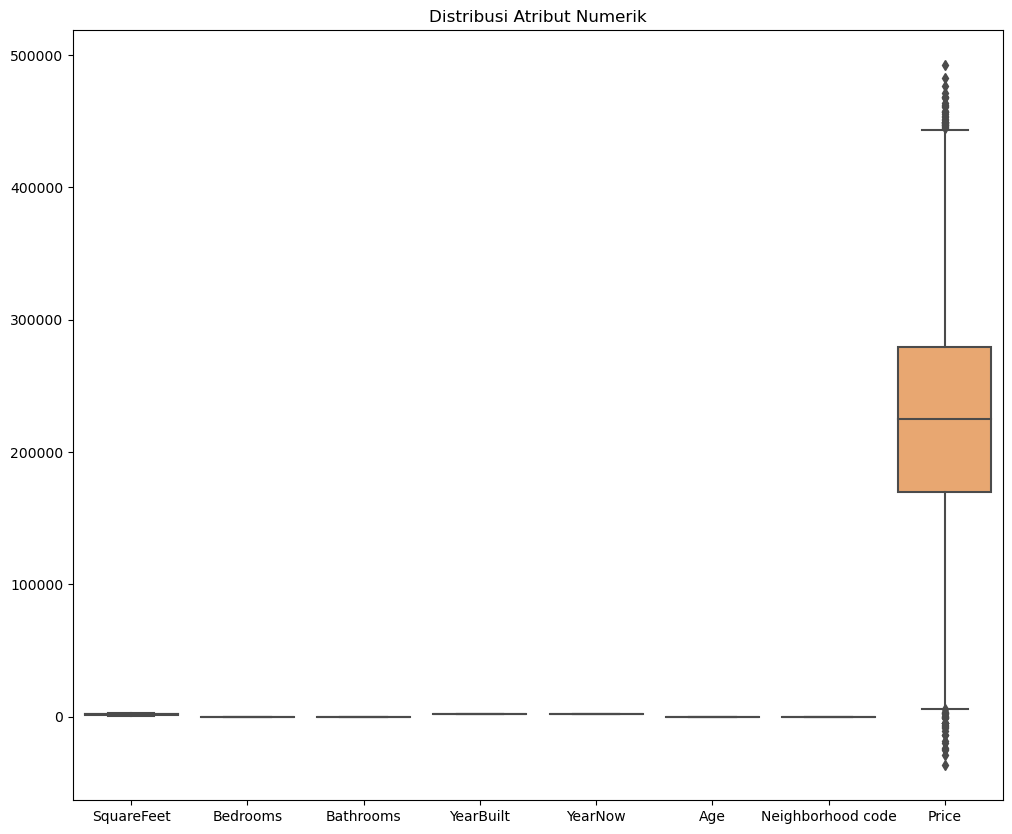

In [23]:
# Sebelum Normalisasi
colors = sns.color_palette("Spectral")
fig, ax = plt.subplots(figsize = (12,10))
sns.boxplot(data = hp, palette = colors)
plt.title("Distribusi Atribut Numerik")
plt.show()

In [24]:
# Melakukan normalisasi dengan Zscore karena dataset tidak berdistribusi dengan normal. Selain itu, Zscore juga bersifat fleksibel dan cocok dengan dataset yang tidak normal.
from sklearn.preprocessing import StandardScaler

HPforNorm = hp[['SquareFeet','Bedrooms','Bathrooms', 'YearBuilt', 'YearNow', 'Age', 'Neighborhood code', 'Price']]
SSc = StandardScaler()
hp_norm = SSc.fit_transform(HPforNorm)
for i in range(len(hp_norm)): #data yang sudah dinormalisasikan masuk ke dalam kolomnya masing-masing di HPforNorm
    HPforNorm.loc[i, "SquareFeet"] = hp_norm[i, 0]
    HPforNorm.loc[i, "Bedrooms"] = hp_norm[i, 1]
    HPforNorm.loc[i, "Bathrooms"] = hp_norm[i, 2]
    HPforNorm.loc[i, "YearBuilt"] = hp_norm[i, 3]
    HPforNorm.loc[i, "YearNow"] = hp_norm[i, 4]
    HPforNorm.loc[i, "Age"] = hp_norm[i, 5]
    HPforNorm.loc[i, "Neighborhood code"] = hp_norm[i, 6]
    HPforNorm.loc[i, "Price"] = hp_norm[i, 7]
    
HPforNorm.head()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,YearNow,Age,Neighborhood code,Price
0,0.207861,0.449067,-1.220113,-0.791751,0,0.791751,-1.223957,-0.124401
1,0.786480,-0.446738,0.005614,-0.260842,0,0.260842,-1.223957,-0.391551
2,-0.254340,-1.342543,-1.220113,-0.743486,0,0.743486,0.001790,1.077785
3,0.499777,-1.342543,-1.220113,0.511390,0,-0.511390,1.227536,-0.236936
4,0.214811,1.344872,0.005614,0.752713,0,-0.752713,0.001790,0.625272


In [25]:
# Mengecek jumlah baris dan kolom setelah normalisasi
HPforNorm.shape

(50000, 8)

In [26]:
# Menggabungkan kolom Neighborhood ke dalam HP bersama dengan data dari HPforNorm
HP = pd.concat([HPforNorm, hp[['Age Category','Neighborhood','Price Category']]], axis = 1 )
HP.head()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,YearNow,Age,Neighborhood code,Price,Age Category,Neighborhood,Price Category
0,0.207861,0.449067,-1.220113,-0.791751,0,0.791751,-1.223957,-0.124401,Tua,Rural,murah
1,0.786480,-0.446738,0.005614,-0.260842,0,0.260842,-1.223957,-0.391551,Muda,Rural,murah
2,-0.254340,-1.342543,-1.220113,-0.743486,0,0.743486,0.001790,1.077785,Tua,Suburb,mahal
3,0.499777,-1.342543,-1.220113,0.511390,0,-0.511390,1.227536,-0.236936,Muda,Urban,murah
4,0.214811,1.344872,0.005614,0.752713,0,-0.752713,0.001790,0.625272,Baru,Suburb,mahal


In [27]:
# Mengubah urutan kolom
HP = HP[['SquareFeet','Bedrooms','Bathrooms','YearBuilt', 'YearNow', 'Age', 'Age Category', 'Neighborhood','Neighborhood code','Price','Price Category']]
HP.head()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,YearNow,Age,Age Category,Neighborhood,Neighborhood code,Price,Price Category
0,0.207861,0.449067,-1.220113,-0.791751,0,0.791751,Tua,Rural,-1.223957,-0.124401,murah
1,0.786480,-0.446738,0.005614,-0.260842,0,0.260842,Muda,Rural,-1.223957,-0.391551,murah
2,-0.254340,-1.342543,-1.220113,-0.743486,0,0.743486,Tua,Suburb,0.001790,1.077785,mahal
3,0.499777,-1.342543,-1.220113,0.511390,0,-0.511390,Muda,Urban,1.227536,-0.236936,murah
4,0.214811,1.344872,0.005614,0.752713,0,-0.752713,Baru,Suburb,0.001790,0.625272,mahal


In [28]:
# Mengecek ulang jumlah baris dan kolom setelah menggabungkan neighborhood
HP.shape

(50000, 11)

### Visualisasi 5
Visualisasi berikut menampilkan bopxlot seluruh kolom dan kolom Price bersama dengan outliernya. Visualisasi ini merupakan visualisasi setelah dilakukan normalisasi.

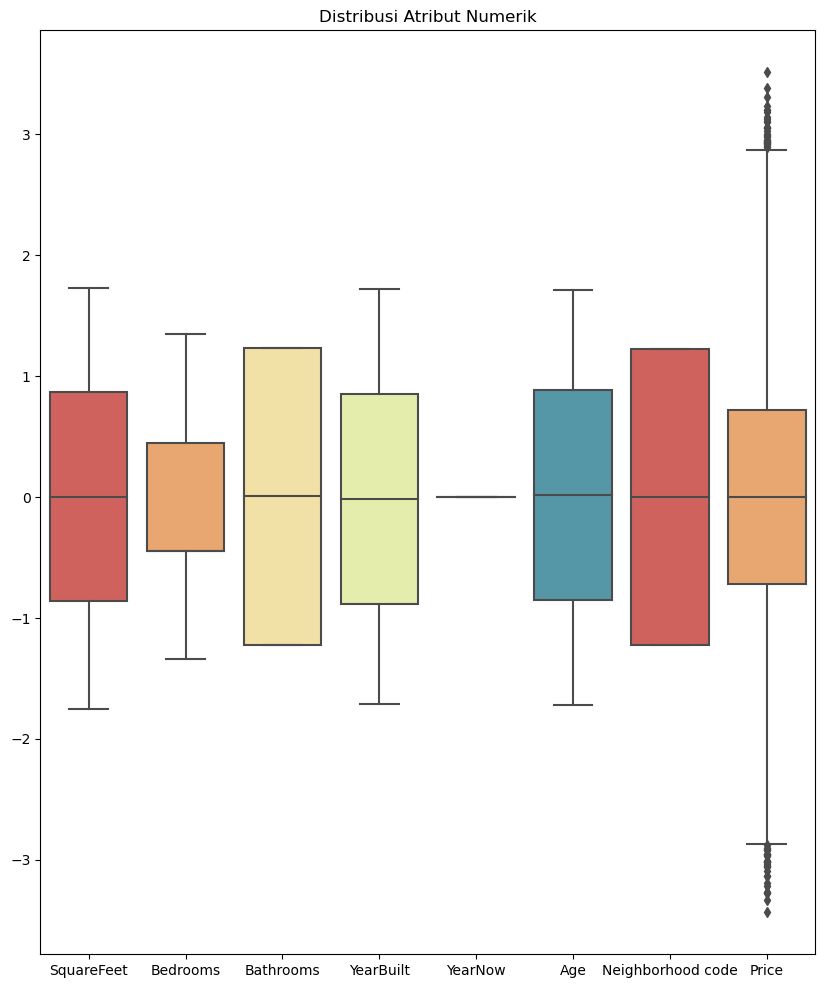

In [29]:
colors = sns.color_palette("Spectral")
fig, ax = plt.subplots(figsize = (10,12))
sns.boxplot(data = HP, palette = colors)
plt.title("Distribusi Atribut Numerik")
plt.show()

Price memiliki data yang outlier. Berbeda dengan 7 kolom numerik lainnya yang tidak memiliki data yang outlier.

In [30]:
# Penanganan Outlier dengan menggunakan IQR
Q1 = HP["Price"].quantile(0.25) # mencari Q1
Q3 = HP["Price"].quantile(0.75) # mencari Q3
IQR = Q3 - Q1  # mencari IQR

# data outlier
outlier_indices = HP[((HP["Price"] < (Q1-1.5*IQR)) | (HP["Price"] > (Q3+1.5*IQR)))].index

# menghapus row data yang outlier
HP.drop(outlier_indices, inplace=True)

# menampilkan jumlah baris dan kolom HP yang sudah bersih
HP.shape 

(49941, 11)

In [31]:
# menampilkan data HP
HP

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,YearNow,Age,Age Category,Neighborhood,Neighborhood code,Price,Price Category
0,0.207861,0.449067,-1.220113,-0.791751,0,0.791751,Tua,Rural,-1.223957,-0.124401,murah
1,0.786480,-0.446738,0.005614,-0.260842,0,0.260842,Muda,Rural,-1.223957,-0.391551,murah
2,-0.254340,-1.342543,-1.220113,-0.743486,0,0.743486,Tua,Suburb,0.001790,1.077785,mahal
3,0.499777,-1.342543,-1.220113,0.511390,0,-0.511390,Muda,Urban,1.227536,-0.236936,murah
4,0.214811,1.344872,0.005614,0.752713,0,-0.752713,Baru,Suburb,0.001790,0.625272,mahal
...,...,...,...,...,...,...,...,...,...,...,...
49995,-1.258671,1.344872,1.231341,-0.502164,0,0.502164,Muda,Rural,-1.223957,-1.638359,murah
49996,1.472831,-1.342543,0.005614,0.125274,0,-0.125274,Muda,Suburb,0.001790,1.965829,mahal
49997,1.690031,1.344872,1.231341,-1.129602,0,1.129602,Tua,Suburb,0.001790,2.091949,mahal
49998,1.024531,1.344872,0.005614,-0.067784,0,0.067784,Muda,Rural,-1.223957,2.044696,mahal


### Visualisasi 6
Berikut merupakan visualisasi setelah dilakukan normalisasi dan penanganan outliers.

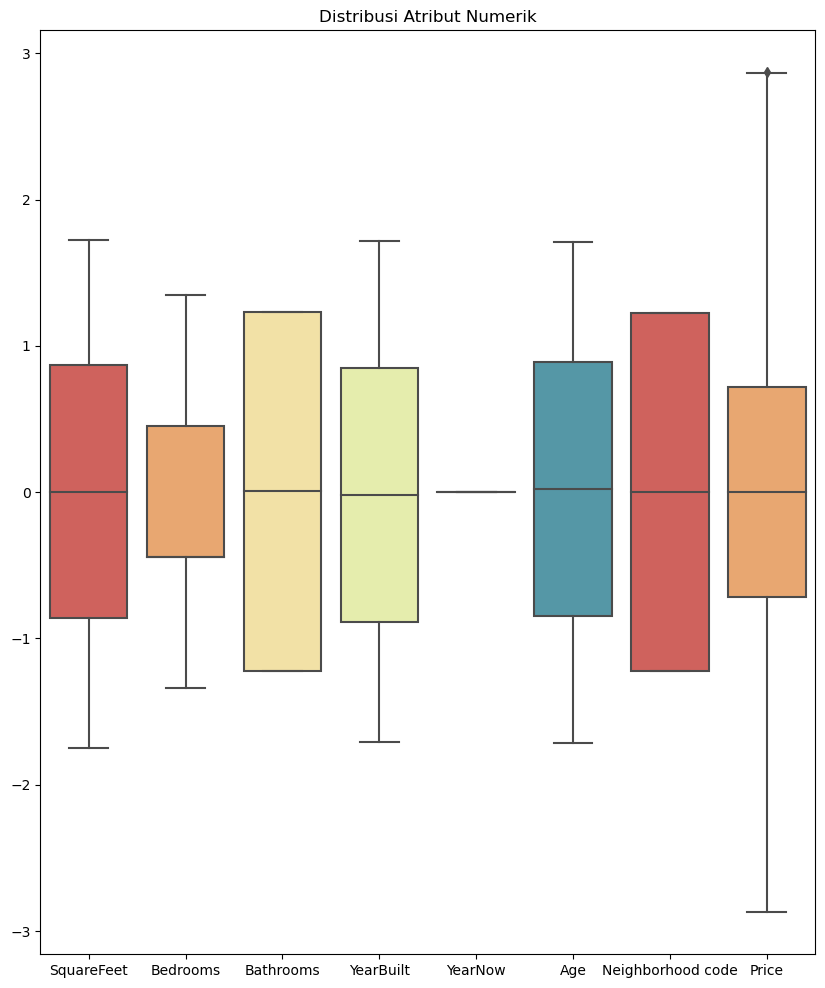

In [32]:
# Setelah handling outliers
colors = sns.color_palette("Spectral")
fig, ax = plt.subplots(figsize = (10,12))
sns.boxplot(data = HP, palette = colors)
plt.title("Distribusi Atribut Numerik")
plt.show()

### Machine Learning : Regression

##### menggunakan regresi sebagai machine learning model untuk memprediksi data dari variabel dependen dan independen berdasarkan dataset.

### Algoritma Simple Regression Model

In [33]:
msk = np.random.rand(len(HP))<0.8 # nilai ambang batas
train = HP[msk] # untuk melatih model ML 80%
test = HP[~msk] # untuk evaluasi model ML 20%

### Visualisasi 7
Visualisasi ini menggunakan scatter plot untuk melihat korelasi antara values SquareFeet dengan Price.

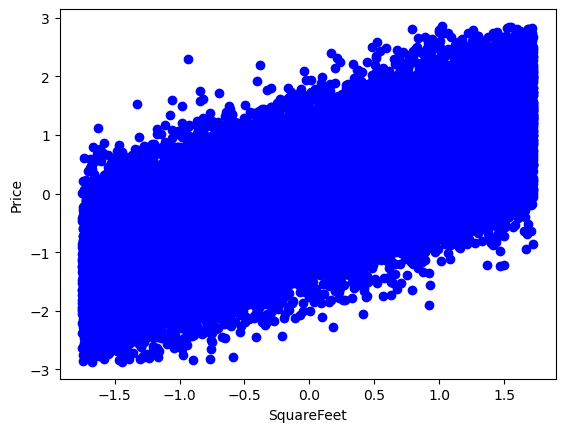

In [34]:
plt.scatter(train['SquareFeet'],train['Price'], color='blue')
plt.xlabel('SquareFeet')
plt.ylabel('Price')
plt.show()

In [35]:
# modeling
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['SquareFeet']])
train_y = np.asanyarray(train[['Price']])
regr.fit(train_x,train_y)
print('Coefficients:', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients: [[0.74683489]]
Intercept:  [0.00017118]


### Visualisasi 8
Hasil visualisasi dari simple regression line model adalah positive.

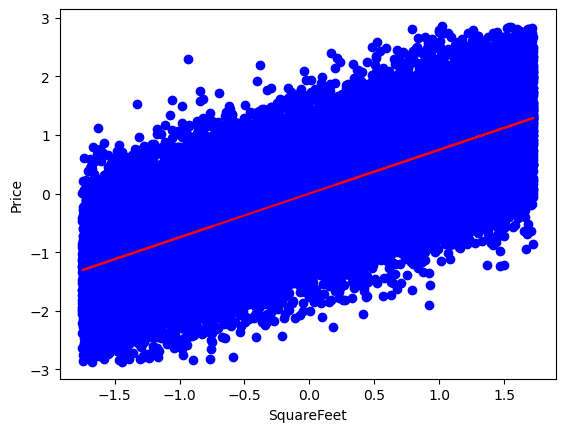

In [36]:
# plot output
plt.scatter(train['SquareFeet'],train['Price'], color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x+regr.intercept_[0], '-r')
plt.xlabel('SquareFeet')
plt.ylabel('Price')
plt.show()

##### Teknik Evaluasi Algoritma Simple Regression Model

In [37]:
# EVALUATION

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['SquareFeet']])
test_y = np.asanyarray(test[['Price']])
test_y_= regr.predict(test_x)

print('Mean absoulute error: %.2f' % np.mean(np.absolute(test_y_ - test_y)))
print('Residual sum of squares (MSE): %.2f' % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_))

Mean absoulute error: 0.52
Residual sum of squares (MSE): 0.43
R2-score: 0.57


Kesimpulan :
1. Nilai MAE yang rendah (0.52), berarti model dapat memprediksi harga rumah dengan akurat
2. Nilai RMSE yang rendah (0.43), berarti model tidak membuat kesalahan yang besar
3. Nilai R-squared yang tinggi (0.57), berarti model dapat menjelaskan varians variabel dependen dengan baik
4. Hasil evaluasi, cukup baik karena data MAE dan RMSE cenderung renah dan nilai R-Squared yang tinggi.

##### Uji Coba Prediksi Data Lain :
Data :
Beverly ingin memprediksi harga rumah impian dengan kriteria berikut :
1. SquareFeet = 1800
2. Bedrooms = 4
3. Bathrooms = 2
4. Age = 10

Maka, berikut penyelesaiannya

In [38]:
y_pred = regr.predict(train_x)

In [39]:
# Skor akurasi model sebesar 56,11% berdasarkan Simple Regression yang sudah dilakukan
regr.score(train_x, train_y)

0.5611033495026813

In [40]:
# Prediksi harga rumah impian Beverly
regr.predict([[1800]])

array([[1344.30298108]])

Berdasarkan hasil Simple Regression Model tersebut, dapat diketahui bahwa harga rumah impian Beverly adalah sekita 1344.30US$.

### Multiple Regression Model

In [41]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['SquareFeet', 'Bedrooms', 'Bathrooms','Age']])
y = np.asanyarray(train[['Price']])
regr.fit(x,y)

print('Coefficients: ', regr.coef_)
print('Intercept: ',regr.intercept_)

Coefficients:  [[0.74718649 0.07335981 0.03021329 0.0029526 ]]
Intercept:  [-2.64785896e-05]


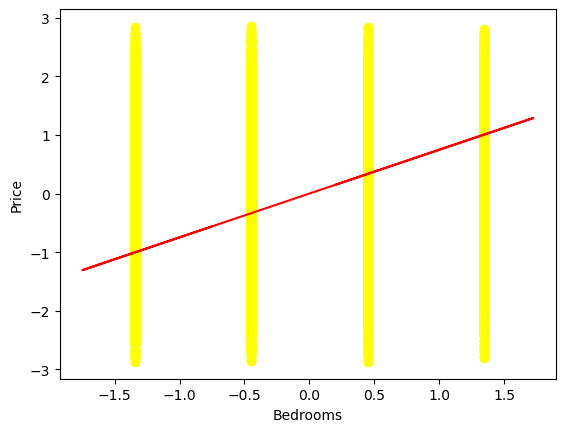

In [42]:
# Visualisasi Hasil Plot Bedrooms yang positive
plt.scatter(train['Bedrooms'],train['Price'], color='yellow')
plt.plot(train_x, regr.coef_[0][0]*train_x+regr.intercept_[0], '-r')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

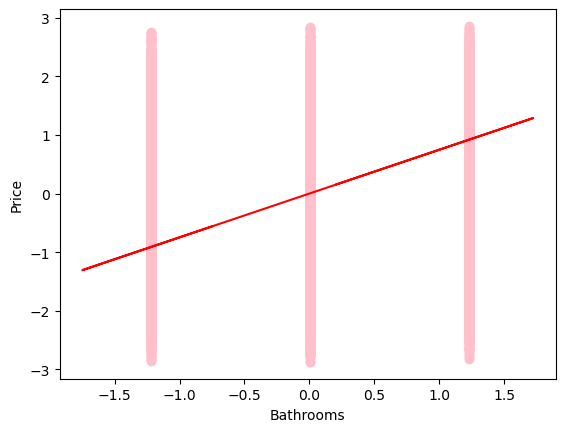

In [43]:
# Visualisasi Hasil Plot Bathrooms yang positive
plt.scatter(train['Bathrooms'],train['Price'], color='pink')
plt.plot(train_x, regr.coef_[0][0]*train_x+regr.intercept_[0], '-r')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()

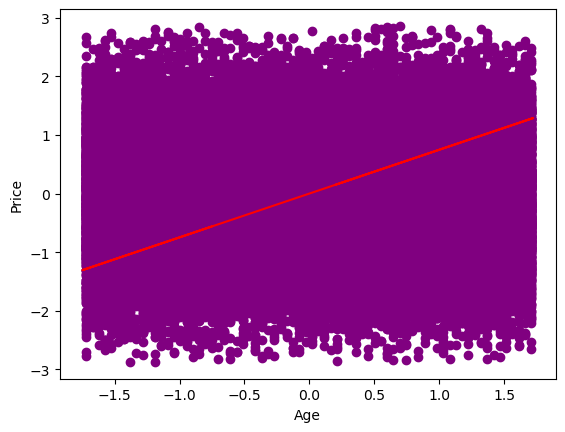

In [44]:
# Visualisasi Hasil Plot YearBuilt yang positive
plt.scatter(train['Age'],train['Price'], color='purple')
plt.plot(train_x, regr.coef_[0][0]*train_x+regr.intercept_[0], '-r')
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()

##### Teknik Evaluasi Algoritma Multiple Regression Model

In [45]:
# EVALUATION
y_hat = regr.predict(test[['SquareFeet', 'Bedrooms', 'Bathrooms','Age']]) 
x = np.asanyarray(test[['SquareFeet', 'Bedrooms', 'Bathrooms','Age']]) 
y = np.asanyarray(test[['Price']]) 

print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))
print("R2-score: %.2f" % r2_score(y, y_hat))
print('Mean absoulute error: %.2f' % np.mean(np.absolute(y_hat - y)))

Residual sum of squares: 0.42
R2-score: 0.58
Mean absoulute error: 0.52


C:\Users\cathe\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Kesimpulan :
1. Nilai MAE yang rendah (0.52), berarti model dapat memprediksi harga rumah dengan akurat
2. Nilai RMSE yang rendah (0.42), berarti model tidak membuat kesalahan yang besar
3. Nilai R-squared yang tinggi (0.58), berarti model dapat menjelaskan varians variabel dependen dengan baik
4. Hasil evaluasi, cukup baik karena data MAE dan RMSE cenderung renah dan nilai R-Squared yang tinggi.

##### Uji Coba Prediksi Data Lain :
Data :
Beverly ingin memprediksi harga rumah impian dengan kriteria berikut :
1. SquareFeet = 1800
2. Bedrooms = 4
3. Bathrooms = 2
4. Age = 10

Maka, berikut penyelesaiannya

In [46]:
y_pred = regr.predict(x)

In [47]:
# Skor akurasi model sebesar 57,83% berdasarkan Multiple Regression yang sudah dilakukan
regr.score(x,y)

0.5783426146065824

In [48]:
# Prediksi harga rumah impian Beverly
regr.predict([[1800,4,2,10]])

array([[1345.31905335]])

Berdasarkan hasil Multiple Regression Model tersebut, dapat diketahui bahwa harga rumah impian Beverly adalah sekita 1345.32 US$.

### Random Forest Regression

In [67]:
X = HP[['SquareFeet', 'Bedrooms', 'Bathrooms','Age']]
y = HP['Price']

In [68]:
# Membagi data train (80%) dan data test (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [69]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

# Feature Importances menunjukkan seberapa penting nilai setiap kolom dalam mempengaruhi kolom harga
print('Feature Importances: ', regressor.feature_importances_)

Feature Importances:  [0.76191839 0.03164608 0.03699445 0.16944108]


##### Teknik Evaluasi Algoritma Random Forest Model

In [70]:
y_pred = regressor.predict(X_test)

In [71]:
#EVALUATION
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
mse = mean_squared_error (y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error (y_test, y_pred)
r2 = r2_score (y_test, y_pred)
print("Residual sum of squares: %.2f" % rmse)
print("R2-score: %.2f" % r2)
print('Mean absoulute error: %.2f' % mae)

Residual sum of squares: 0.71
R2-score: 0.49
Mean absoulute error: 0.57


Kesimpulan :
1. Nilai MAE yang cenderung lebih tinggi (0.57), berarti model kurang dapat memprediksi harga rumah dengan akurat.
2. Nilai RMSE yang sangat tinggi (0.71), berarti model dapat berpotensi membuat kesalahan yang besar.
3. Nilai R-squared yang tinggi (0.49), berarti model dapat menjelaskan varians variabel dependen dengan cukup baik.
4. Hasil evaluasi, kurang baik karena data dari RMSE dan MAE yang cukup tinggi.

##### Uji Coba Prediksi Data Lain :
Data :
Beverly ingin memprediksi harga rumah impian dengan kriteria berikut :
1. SquareFeet = 1800
2. Bedrooms = 4
3. Bathrooms = 2
4. Age = 10

Maka, berikut penyelesaiannya

In [72]:
# Skor akurasi model sebesar 49.47% berdasarkan Random Forest Regression Model yang sudah dilakukan
regressor.score(X_test, y_test)

0.4947721999457073

In [73]:
# Prediksi harga rumah impian Beverly
regressor.predict([[1800,4,2,10]])

C:\Users\cathe\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1.29653768])

Berdasarkan hasil Random Forest Regression Model tersebut, dapat diketahui bahwa harga rumah impian Beverly adalah sekitar 1.29 US$.

----

## <div align="center"> Conclusion </div>

##### Kesimpulan Kelompok :
Berdasarkan nilai MAE, RMSE, dan Rsquared pada kedua evaluasi yang telah dilakukan, terdapat perbedaan nilai RMSE dan Rsquares antara kedua model tersebut. Nilai RMSE Multiple Regression yaitu 0.42 lebih rendah daripada nilai RMSE Simple Regression yaitu 0.43. Sedangkan, nilai R-squared Multiple Regression yaitu 0.58 lebih tinggi daripada nilai R-square Simple Regression yaitu 0.57. Selain itu, persamaan nilai MAE yaitu sebesar 0.52 menunjukkan bahwa kedua model tersebut dapat memprediksi harga rumah dengan sama akuratnya. Pada sisi lain, berdasarkan skor akurasi masing-masing model, Multiple Regression model lebih akurat yaitu sebesar 57.83% daripada Simple Regression Model yang sebesar 56.11%.

##### Kesimpulan Individu :
Berdasarkan nilai MAE, RMSE, dan Rsquared pada ketiga evaluasi yang telah dilakukan, model yang paling baik digunakan untuk memprediksi rumah dari data ini adalah model Multiple Regression. Selain itu, keputusan model yang lebih baik digunakan juga didukung oleh hasil keakuratan regresi tiap model. Multiple Regression model lebih akurat dengan hasil sebesar 57.83% daripada Simple Regression Model yang sebesar 56.11% dan Random Forest Regression yang sebesar 49.47%.

----